# 本实验使用的是提供的u2.base和u2.test作为训练数据和测试数据，测试时注意将文件放到对应的路径下。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import re
import random
#初始化原始评分矩阵、测试矩阵
base_array = np.zeros((943,1682))
test_array = np.zeros((943,1682))
with open('./lab4_data/u2.base','r') as ms:
    for lin in ms.readlines():
        strs = re.split('\t',lin)
        base_array[int(strs[0])-1][int(strs[1])-1] = int(strs[2])

with open('./lab4_data/u2.test','r') as ms:
    for lin in ms.readlines():
        strs = re.split('\t',lin)
        test_array[int(strs[0])-1][int(strs[1])-1] = int(strs[2])

#初始化用户因子矩阵、物品因子矩阵
N = len(base_array)
M = len(base_array[0])
K = 14

P = np.random.rand(N,K)
Q = np.random.rand(M,K)

In [2]:
def compute_descent(R, P, Q, K, alpha=0.0002, beta=0):
    Q = Q.T
    for i in range(len(R)):
        for j in range(len(R[i])):
            if R[i][j] > 0:
                eij = R[i][j] - np.dot(P[i,:],Q[:,j])
                for k in range(K):
                    P[i][k] = P[i][k] + alpha * (2 * eij * Q[k][j] - beta * P[i][k])
                    Q[k][j] = Q[k][j] + alpha * (2 * eij * P[i][k] - beta * Q[k][j])
    return P, Q.T

In [3]:
def compute_loss(R, P, Q, K, alpha=0.0002, beta=0):
    Q = Q.T
    e = 0
    for i in range(len(R)):
        for j in range(len(R[i])):
            if R[i][j] > 0:
                e = e + pow(R[i][j] - np.dot(P[i,:],Q[:,j]), 2)
    return e

In [4]:
loss = []
with open('./lab4_data/u2.base','r') as ms:
    lin = ms.readlines()
    length = len(lin)
    for i in range(140):
        P , Q = compute_descent(base_array,P,Q,K)
        nLoss = compute_loss(test_array,P,Q,K)
        loss.append(nLoss/20000)
        print (nLoss/20000)
        print (i)

1.67672294703
0
1.47825480003
1
1.36134181751
2
1.28488886986
3
1.23123302722
4
1.19162529911
5
1.16123997072
6
1.13720330909
7
1.11770609359
8
1.10155918794
9
1.08795276595
10
1.07631821903
11
1.06624546058
12
1.05743163611
13
1.04964833336
14
1.04272004214
15
1.03650964894
16
1.03090844368
17
1.02582908998
18
1.02120058468
19
1.01696458064
20
1.0130726613
21
1.00948429163
22
1.00616525744
23
1.00308646243
24
1.00022299093
25
0.997553370293
26
0.995058985024
27
0.992723607495
28
0.990533018971
29
0.988474701304
30
0.986537584352
31
0.98471183767
32
0.982988697652
33
0.981360323224
34
0.979819674718
35
0.978360411655
36
0.976976806045
37
0.975663668515
38
0.974416285059
39
0.973230362676
40
0.972101982427
41
0.971027558768
42
0.970003804167
43
0.969027698227
44
0.968096460637
45
0.967207527409
46
0.966358529936
47
0.965547276478
48
0.964771735757
49
0.964030022372
50
0.963320383803
51
0.962641188812
52
0.961990917043
53
0.961368149707
54
0.96077156119
55
0.960199911501
56
0.95965203944

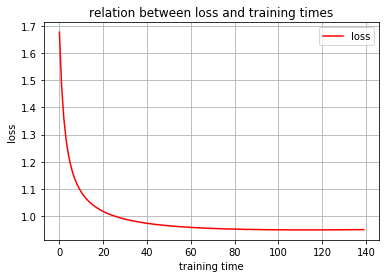

In [5]:
plt.title('relation between loss and training times')
plt.xlabel('training time')
plt.ylabel('loss')
plt.plot(loss,label = 'loss',color = 'red')
plt.legend(loc='upper right')
plt.grid()
plt.show()

In [10]:
#算出最终的预测评分矩阵
R_predict = np.dot(P,Q.T)
print (R_predict)

[[ 4.06850422  3.20137087  3.04955492 ...,  3.29921814  4.09450339
   3.76708388]
 [ 4.35483252  3.74530503  3.11001014 ...,  3.43445732  4.10456341
   4.18715659]
 [ 2.96035725  2.88173137  2.53314314 ...,  2.19924677  3.08045796
   2.92132236]
 ..., 
 [ 4.292344    3.65167058  3.29679114 ...,  3.89161539  4.2798199
   3.7577096 ]
 [ 4.5229261   3.25642368  2.91743461 ...,  4.02122557  4.32412631
   4.04107317]
 [ 3.81489397  3.27521547  3.09343978 ...,  3.06756413  4.07421568
   3.58411409]]
